##### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Answer:
$$\text{Number of multiplications} = k \times m \times \times n$$
$$
\text{Number of additions} = (k-1) \times m \times n
$$    

Explaination:
Matrix multiplication is Row-Column operation i.e. all elements in the each row of $1^{st}$ matrix get multiplied to the corresponding elements in each column of the $2^{nd}$ matrix and the result is summation of the terms generated from addition of terms generated after multiplication in each case.

Also, in case of addition, $\text{number of addition operations} = \text{number of terms} -1$

##### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [25]:
import numpy as np

In [26]:
A_mat = np.random.randint(1, 100, size=(55,30))
B_mat = np.random.randint(101, 500, size=(30,68))
A_B = np.zeros(shape=(55,68))

In [27]:
%%timeit
for i in range(A_mat.shape[0]):
    for j in range(B_mat.shape[1]):
        for k in range(A_mat.shape[1]):  #A_mat.shape[1] == B_mat.shape[0]
            A_B[i][j] += A_mat[i][k] * B_mat[k][j]

65.2 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit
C = np.matmul(A_mat, B_mat)

159 µs ± 7.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The numpy method is faster than the lists method.

Reason:
Lists in Python are slower than NumPy operations due to the dynamic nature of Python, which involves type-checking and function dispatches during each loop cycle, causing overhead, whereas NumPy uses pre-compiled, optimized code for array operations, resulting in faster execution.

##### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Time complexity = $O(\frac{n}{2} \times n)$ = $O(n^2)$ \
where n in the number of elements in the array

A better method: Sort the array using an efficient sorting algorithm $(\sim O(n\log{n}))$ and get the $(\frac{n-1}{2})^{th}$ element if n is odd or get the average of the $(\frac{n}{2})^{th}$ and $(\frac{n}{2} +1)^{th}$ elements if n is even, where n in the number of elements in the array

First method:

In [29]:
def find_nth_max(arr, n, prior_max = np.infty):
    prior_flag = False
    if(prior_max != np.infty):
        prior_flag = True
    
    nth_counter = 0
    max = -2 #arbitrary
    while nth_counter < n:
        for i in range(len(arr)):
            if (arr[i] < prior_max and arr[i] >= max):
                max = arr[i]
        if (prior_flag):
            prior_max = max
            max = -2
            return prior_max
            
        prior_max = max
        max = -2
        nth_counter+=1

    return prior_max

In [30]:
def find_median(median_array):
    n = len(median_array)
    if (n%2 == 0):  #n is even
        m1 = find_nth_max(median_array, int(n-(n/2)))
        m2 = find_nth_max(median_array, int(n-(n/2))+1, m1)
        return (m1+m2)/2
    
    else: #n is odd
        m1 = find_nth_max(median_array, int((n+1)/2))
        return m1

In [31]:
M1_arr = [5, 23, 98, 5, 7, 96, 123, 75, 1526]

M2_arr = [5, 23, 98, 5, 7, 96, 123, 75, 1526, 458]

In [32]:
%%timeit
find_median(M1_arr)

2.87 µs ± 221 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [33]:
%%timeit
find_median(M2_arr)

3.99 µs ± 273 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Second method:

In [34]:
def find_median2(median_array):
    n = len(median_array)
    median_array.sort()

    if (n%2 == 0):
        m1 = median_array[int(n/2)-1]
        m2 = median_array[int(n/2)]
        return (m1+m2)/2
    
    else:
        m1 = median_array[int((n+1)/2)-1]
        return m1

In [35]:
%%timeit
find_median2(M1_arr)

190 ns ± 7.06 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [36]:
%%timeit
find_median2(M2_arr)

269 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [37]:
%%timeit
np.median(M1_arr)

9.83 µs ± 781 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [38]:
%%timeit
np.median(M2_arr)

9.19 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Checking for the correctness of the written algorithms


In [39]:
print(find_median(M1_arr))
print(find_median2(M1_arr))
print(np.median(M1_arr))

75
75
75.0


In [40]:
print(find_median(M2_arr))
print(find_median2(M2_arr))
print(np.median(M2_arr))

85.5
85.5
85.5


Interestingly, time taken by various algorithms:
Method1 < Method2 < Numpy 

##### 4. What is the gradient of the following function with respect to x and y?
$$ f = x^2y + y^3\sin{x}$$

Answer:
$$\frac{\partial f}{\partial x} = 2xy + y^3\cos{x}$$
$$\frac{\partial f}{\partial y} = x^2 + 3y^2\sin{x}$$


##### 5. Use ```JAX``` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [41]:
import jax
import jax.numpy as jnp
import math

In [42]:
def f(x, y):
    return ((x**2)*y + (y**3)*jnp.sin(x))

In [43]:
def f_x(x,y):
    return ((2*x*y) + ((y**3)*jnp.cos(x)))

In [44]:
def f_y(x,y):
    return ((x**2) + (3*(y**2)*jnp.sin(x)))

In [45]:
# Computing the gradient
grad_fn = jax.grad(f, argnums=(0, 1))


In [46]:
x_value = 2.0
y_value = 3.0

# Evaluate the gradient at the specified values
gradient_at_values = grad_fn(x_value, y_value)

print(f"Gradient at (x={x_value}, y={y_value}): {gradient_at_values}")

Gradient at (x=2.0, y=3.0): (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))


In [47]:
print(f"Gradient at (x={x_value}, y={y_value}) wrt x: {f_x(x_value, y_value)}")
print(f"Gradient at (x={x_value}, y={y_value}) wrt y: {f_y(x_value, y_value)}")

Gradient at (x=2.0, y=3.0) wrt x: 0.7640352249145508
Gradient at (x=2.0, y=3.0) wrt y: 28.551029205322266


In [48]:
x_value = 42.0
y_value = 8.42

# Evaluate the gradient at the specified values
gradient_at_values = grad_fn(x_value, y_value)

print(f"Gradient at (x={x_value}, y={y_value}): {gradient_at_values}")

Gradient at (x=42.0, y=8.42): (Array(468.5097, dtype=float32, weak_type=True), Array(1569.0658, dtype=float32, weak_type=True))


In [49]:
print(f"Gradient at (x={x_value}, y={y_value}) wrt x: {f_x(x_value, y_value)}")
print(f"Gradient at (x={x_value}, y={y_value}) wrt y: {f_y(x_value, y_value)}")

Gradient at (x=42.0, y=8.42) wrt x: 468.50970458984375
Gradient at (x=42.0, y=8.42) wrt y: 1569.0657958984375


##### 6. Use ```sympy``` to confirm that you obtain the same gradient analytically.

In [50]:
from sympy import symbols, sin, diff

In [51]:
# Defining the variables
x, y = symbols('x y')

# Defining the function
f = (x**2)*y + (y**3)*sin(x)

# Gradient computation
grad_f = [diff(f, x), diff(f, y)]

print("Gradient of f = ", grad_f)

Gradient of f =  [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


##### 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2


In [52]:
year_dict = {2022:{"Branch 1": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}} , "Branch 2": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}}}, 
                2023:{"Branch 1": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}} , "Branch 2": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}}}, 
                2024:{"Branch 1": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}} , "Branch 2": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}}}, 
                2025:{"Branch 1": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}} , "Branch 2": {"Roll Number": 1, "Name": "N", "Marks":{"Maths":100, "English":70}}}}

print(year_dict)

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 2023: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 2024: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 2025: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}}


##### 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [53]:
class marks:
    def __init__(self, english_mark = None, maths_marks = None):
        self.English = english_mark
        self.Maths = maths_marks

class student:
    def __init__(self, name_str = None, roll_num = None, marks_class = None):
        self.Name = name_str
        self.RollNumber = roll_num
        self.Marks = marks_class

class branch:
    def __init__(self, branch_num = None, student_lst = None):
        self.Branch = branch_num
        self.StudentList = student_lst      

class year:
    def __init__(self, year_num = None, branch_lst = None):
        self.Year = year_num
        self.Branch = branch_lst

YearDatabase = []


In [54]:
m1 = marks()
m1.English = 100
m1.Maths = 70

s1 = student()
s1.RollNumber = 1
s1.Name = "N"
s1.Marks = m1

B1 = branch()
B1.Branch = 1
B1.StudentList = [s1]

B2 = branch()
B2.Branch = 2

y_2022 = year()
y_2022.Year = 2022
y_2022.Branch = [B1, B2]

YearDatabase.append(y_2022)

In [55]:
#Accessing info
YearDatabase[0].Branch[0].StudentList[0].Name

'N'

##### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $$y = x$$

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xkcd()

Text(0.5, 1.0, 'y = x')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

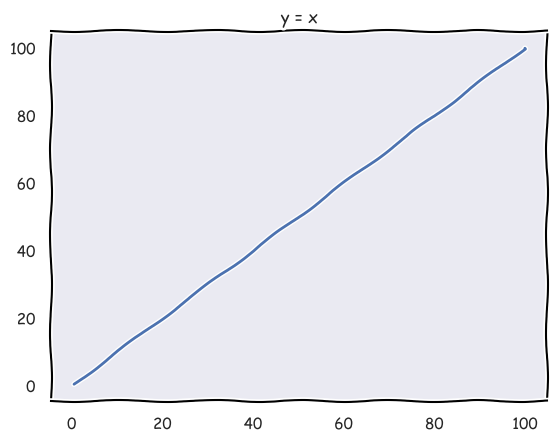

In [57]:
x = np.arange(start=0.5, stop=100.5, step=0.5)
y = x
plt.plot(x,y)
plt.show
plt.title("y = x")

2. $$y = x^2$$

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

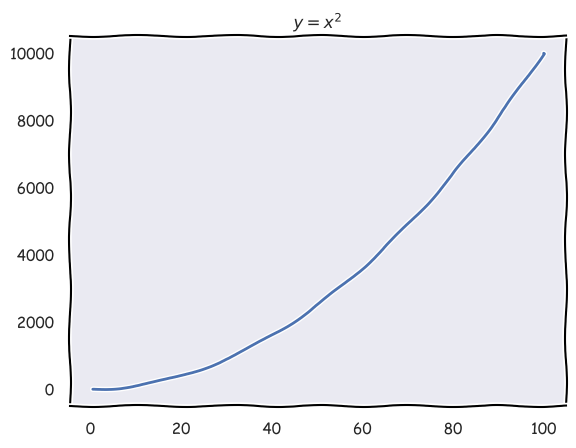

In [58]:
x = np.arange(0.5, 100.5, 0.5)
y = x**2
plt.plot(x,y)
plt.title("$y = x^2$")
plt.show

3. $$y = \frac{x^3}{100}$$

<function matplotlib.pyplot.show(close=None, block=None)>

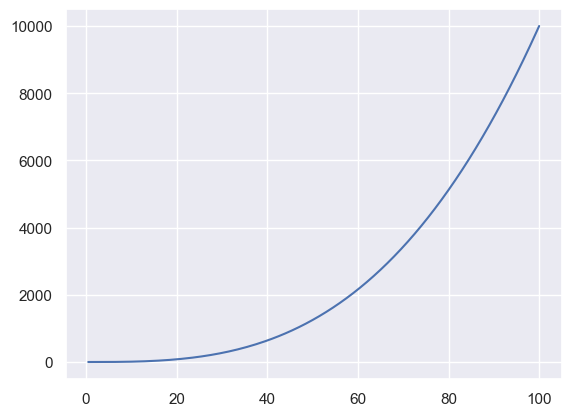

In [59]:
plt.rcdefaults()
sns.set()
x = np.arange(0.5, 100.5, 0.5)
y = (x**3)/100
plt.plot(x,y)
plt.show

4. $$y = \sin{(x)}$$

<function matplotlib.pyplot.show(close=None, block=None)>

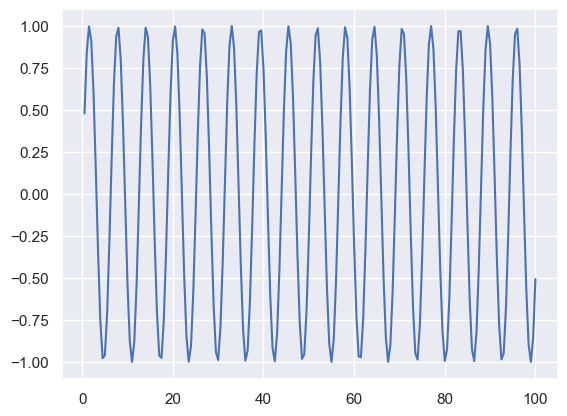

In [60]:
x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)
plt.plot(x,y)
plt.show

5. $$y = \frac{\sin{(x)}}{x}$$

<function matplotlib.pyplot.show(close=None, block=None)>

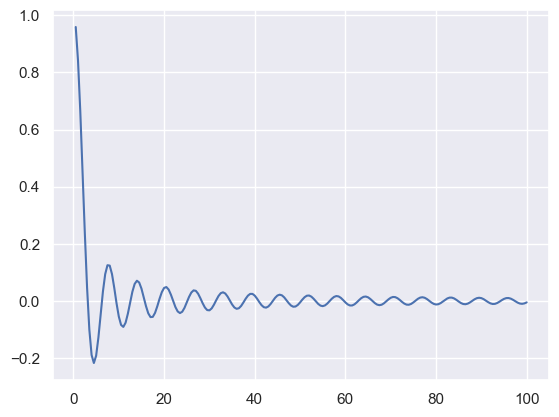

In [61]:
x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)/x
plt.plot(x,y)
plt.show

6. $$y = \log{(x)}$$

<function matplotlib.pyplot.show(close=None, block=None)>

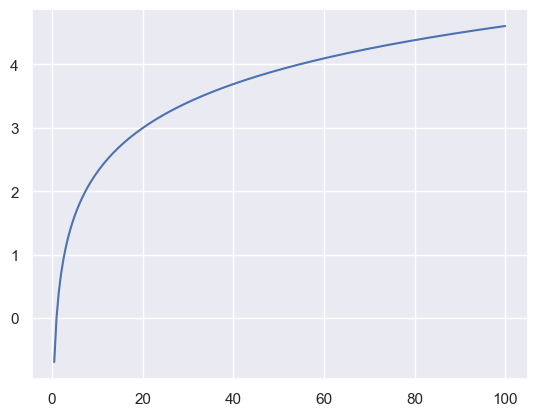

In [62]:
x = np.arange(0.5, 100.5, 0.5)
y = np.log(x)
plt.plot(x,y)
plt.show

7. $$y = e^{x}$$

<function matplotlib.pyplot.show(close=None, block=None)>

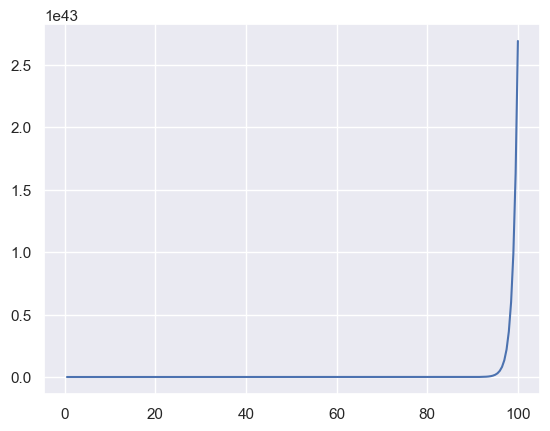

In [63]:
x = np.arange(0.5, 100.5, 0.5)
y = np.exp(x)
plt.plot(x,y)
plt.show

The scale seems different on the y-axis

In [64]:
#Define your function
def my_function(x, y):
    return x**2 + y**3

# Use JAX's grad function to compute the gradient
grad_fn = jax.grad(my_function, argnums=(0, 1))

# Specify the values for x and y at which you want to compute the gradient
x_value = 2.0
y_value = 3.0

# Evaluate the gradient at the specified values
gradient_at_values = grad_fn(x_value, y_value)

print(f"Gradient at (x={x_value}, y={y_value}): {gradient_at_values}")

Gradient at (x=2.0, y=3.0): (Array(4., dtype=float32, weak_type=True), Array(27., dtype=float32, weak_type=True))


In [65]:
#Define your function
def my_function(x, y):
    return ((x**2)*y + (y**3)*jnp.sin(x))
# Use JAX's grad function to compute the gradient
grad_fn = jax.grad(my_function, argnums=(0, 1))

# Specify the values for x and y at which you want to compute the gradient
x_value = 2.0
y_value = 3.0

# Evaluate the gradient at the specified values
gradient_at_values = grad_fn(x_value, y_value)

print(f"Gradient at (x={x_value}, y={y_value}): {gradient_at_values}")


Gradient at (x=2.0, y=3.0): (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))


##### 10. Using numpy generate a matrix of size 20 $\times$ 5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [66]:
mat = np.random.uniform(low=1.0, high=2.0, size=(20,5))
mat

array([[1.7123754 , 1.85003311, 1.89215983, 1.64694368, 1.14619332],
       [1.95215697, 1.96907894, 1.59188053, 1.51062957, 1.62302287],
       [1.42689849, 1.67977322, 1.46503712, 1.6834967 , 1.52951337],
       [1.00244631, 1.18106553, 1.80533565, 1.95117855, 1.48161175],
       [1.78445296, 1.54596824, 1.71209798, 1.17115151, 1.01516828],
       [1.20912428, 1.86198084, 1.80674529, 1.39253438, 1.89197039],
       [1.62020026, 1.90134172, 1.88393446, 1.5881829 , 1.38902522],
       [1.49075511, 1.12995006, 1.26420488, 1.44534356, 1.25150876],
       [1.76185122, 1.63615193, 1.53767279, 1.16770071, 1.7242426 ],
       [1.59246586, 1.26107233, 1.91482234, 1.5894731 , 1.19228029],
       [1.2121975 , 1.95033846, 1.69021623, 1.07561739, 1.6643383 ],
       [1.78569114, 1.98102836, 1.20261968, 1.02319484, 1.43229667],
       [1.18445115, 1.2330541 , 1.52186007, 1.98992522, 1.50072343],
       [1.79537743, 1.48111758, 1.92942939, 1.79996759, 1.55752793],
       [1.53243991, 1.06254713, 1.

In [67]:
import pandas as pd

In [68]:
mat_df = pd.DataFrame(mat)
mat_df.set_axis(['a', 'b', 'c', 'd', 'e'], axis='columns', inplace=True) 
mat_df

C:\Users\parag\AppData\Local\Temp\ipykernel_24912\3590558673.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  mat_df.set_axis(['a', 'b', 'c', 'd', 'e'], axis='columns', inplace=True)


,a,b,c,d,e
0,1.712375,1.850033,1.892160,1.646944,1.146193
1,1.952157,1.969079,1.591881,1.510630,1.623023
2,1.426898,1.679773,1.465037,1.683497,1.529513
3,1.002446,1.181066,1.805336,1.951179,1.481612
4,1.784453,1.545968,1.712098,1.171152,1.015168
5,1.209124,1.861981,1.806745,1.392534,1.891970
6,1.620200,1.901342,1.883934,1.588183,1.389025
7,1.490755,1.129950,1.264205,1.445344,1.251509
8,1.761851,1.636152,1.537673,1.167701,1.724243
9,1.592466,1.261072,1.914822,1.589473,1.192280


In [69]:
std_dev = mat_df.std()
max_std_col = std_dev.idxmax()
print(f"Column with maximum standard deviation is {max_std_col}")

Column with maximum standard deviation is b


In [70]:
mean = mat_df.mean(axis=1)
min_mean_row = mean.idxmin()
print(f"Column with minimun mean is {min_mean_row}")

Column with minimun mean is 14


##### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [71]:
mat_df['f'] = mat_df.sum(axis=1)
mat_df

,a,b,c,d,e,f
0,1.712375,1.850033,1.892160,1.646944,1.146193,8.247705
1,1.952157,1.969079,1.591881,1.510630,1.623023,8.646769
2,1.426898,1.679773,1.465037,1.683497,1.529513,7.784719
3,1.002446,1.181066,1.805336,1.951179,1.481612,7.421638
4,1.784453,1.545968,1.712098,1.171152,1.015168,7.228839
5,1.209124,1.861981,1.806745,1.392534,1.891970,8.162355
6,1.620200,1.901342,1.883934,1.588183,1.389025,8.382685
7,1.490755,1.129950,1.264205,1.445344,1.251509,6.581762
8,1.761851,1.636152,1.537673,1.167701,1.724243,7.827619
9,1.592466,1.261072,1.914822,1.589473,1.192280,7.550114


In [72]:
mat_df['g'] = np.where(mat_df['f'] < 8, "LT8", "GT8")
mat_df

,a,b,c,d,e,f,g
0,1.712375,1.850033,1.892160,1.646944,1.146193,8.247705,GT8
1,1.952157,1.969079,1.591881,1.510630,1.623023,8.646769,GT8
2,1.426898,1.679773,1.465037,1.683497,1.529513,7.784719,LT8
3,1.002446,1.181066,1.805336,1.951179,1.481612,7.421638,LT8
4,1.784453,1.545968,1.712098,1.171152,1.015168,7.228839,LT8
5,1.209124,1.861981,1.806745,1.392534,1.891970,8.162355,GT8
6,1.620200,1.901342,1.883934,1.588183,1.389025,8.382685,GT8
7,1.490755,1.129950,1.264205,1.445344,1.251509,6.581762,LT8
8,1.761851,1.636152,1.537673,1.167701,1.724243,7.827619,LT8
9,1.592466,1.261072,1.914822,1.589473,1.192280,7.550114,LT8


In [73]:
num_rows_LT8 = (mat_df['g'] == "LT8").sum()
num_rows_LT8

14

In [74]:
LT8_df = mat_df.loc[mat_df['g'] == "LT8"]
std_dev_LT8_f = LT8_df['f'].std()
print(LT8_df)
print(std_dev_LT8_f)

           a         b         c         d         e         f    g
2   1.426898  1.679773  1.465037  1.683497  1.529513  7.784719  LT8
3   1.002446  1.181066  1.805336  1.951179  1.481612  7.421638  LT8
4   1.784453  1.545968  1.712098  1.171152  1.015168  7.228839  LT8
7   1.490755  1.129950  1.264205  1.445344  1.251509  6.581762  LT8
8   1.761851  1.636152  1.537673  1.167701  1.724243  7.827619  LT8
9   1.592466  1.261072  1.914822  1.589473  1.192280  7.550114  LT8
10  1.212198  1.950338  1.690216  1.075617  1.664338  7.592708  LT8
11  1.785691  1.981028  1.202620  1.023195  1.432297  7.424831  LT8
12  1.184451  1.233054  1.521860  1.989925  1.500723  7.430014  LT8
14  1.532440  1.062547  1.162503  1.295889  1.330386  6.383765  LT8
15  1.617161  1.505179  1.781314  1.081544  1.820367  7.805566  LT8
17  1.516902  1.267880  1.707441  1.919261  1.381889  7.793374  LT8
18  1.765045  1.264624  1.206749  1.445240  1.244210  6.925869  LT8
19  1.456008  1.604416  1.322018  1.656403  1.57

In [75]:
GT8_df = mat_df.loc[mat_df['g'] == "GT8"]
std_dev_GT8_f = GT8_df['f'].std()
print(GT8_df)
print(std_dev_GT8_f)

           a         b         c         d         e         f    g
0   1.712375  1.850033  1.892160  1.646944  1.146193  8.247705  GT8
1   1.952157  1.969079  1.591881  1.510630  1.623023  8.646769  GT8
5   1.209124  1.861981  1.806745  1.392534  1.891970  8.162355  GT8
6   1.620200  1.901342  1.883934  1.588183  1.389025  8.382685  GT8
13  1.795377  1.481118  1.929429  1.799968  1.557528  8.563420  GT8
16  1.995041  1.157053  1.858519  1.748839  1.278206  8.037658  GT8
0.23551309167907095


##### 12. Write a small piece of code to explain broadcasting in numpy.

In [76]:
A_arr = np.arange(4)
B_arr = np.arange(4)[:, np.newaxis]

print(A_arr, A_arr.shape)
print(B_arr, B_arr.shape)

[0 1 2 3] (4,)
[[0]
 [1]
 [2]
 [3]] (4, 1)


In [77]:
print(A_arr + B_arr)
print((A_arr + B_arr).shape)

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
(4, 4)


What might have happened with shape of arrays: \
For A_arr -  (4,) -> (1,4) -> (4,4) \
For B_arr -  (4,1)    ->      (4,4)

##### 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [78]:
my_arr = np.random.randint(20, size=(5,6))
my_arr1 = my_arr #Just to get a copy
my_arr = my_arr.flatten()
min_element = my_arr[0]
min_idx = -1

for i in range(len(my_arr)):
    if (my_arr[i] < min_element):
        min_element = my_arr[i]
        min_idx = i

print(f"The index of the minimum element is {min_idx}")

#Using argmin
print(f"The index of the minimum element using argmin is {np.argmin(my_arr1)}")

The index of the minimum element is 14
The index of the minimum element using argmin is 14


In [79]:
my_arr

array([12,  4,  2, 18, 15, 16, 10,  2,  1,  7, 14, 16, 17, 12,  0,  1,  1,
       16, 15, 18, 17, 18, 17, 11,  6, 10, 10, 10,  8,  0])

In [80]:
my_arr1

array([[12,  4,  2, 18, 15, 16],
       [10,  2,  1,  7, 14, 16],
       [17, 12,  0,  1,  1, 16],
       [15, 18, 17, 18, 17, 11],
       [ 6, 10, 10, 10,  8,  0]])